In [2]:
# Comapres the Energy for the QHO to the KS energy

In [3]:
# Imports Modules
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Define grid and Constants
xmax = 10.0 # Grid Size, x-axes go from -xmax to +xmax
Ng = 200 # Number of Grid Points, determines number of Cells in system
NnMax = 52 # Max Number of states (n = 0, 1, 2, ..., NnMax - 2)
Eks = np.zeros(NnMax, dtype=np.float64) # KS energies
Etf = np.zeros(NnMax, dtype=np.float64) # TF energies
Eqh = np.zeros(NnMax, dtype=np.float64) # Eigenvalue Energies

# Generates x axis of graph
xAxis = np.arange(0 , NnMax - 1 , 1.0)

In [5]:
# Function for Quantum Harmonic Oscilator

def QHM(Nn):
    Etot = 0 # Total Energy set to 0

    
    # Sums energy for electrons in filled energy states
    for i in range(Nn):
        Etot +=  2 * (i+(1/2)) * 0.97548  # Adds the eigenvalue of the energy level i to total energy
   
    print('QHO', Etot)
    return(Etot) # Outputs total energy in Hartree units

In [6]:
# Finds total KS energy of the system

def KS_Func(xmax,Ng,Nn):
    import numpy as np
    import matplotlib.pyplot as plt


    
    # Define grid 
    x_g = np.linspace(-xmax, xmax, Ng) # Defines x-coords
    dx = x_g[1] - x_g[0] # Defines setp for change in x
    vext_g = 0.5 * x_g**2  # External potential

    T_gg = np.zeros((Ng, Ng))  # Kinetic operator
    for i in range(Ng):
        T_gg[i, i] = -2.0
        if i > 0:
            T_gg[i, i - 1] = 1.0
            T_gg[i - 1, i] = 1.0
    T_gg *= -0.5 / dx**2

    # Initialize density as even:
    n_g = 2.0 * Nn / (Ng * dx) * np.ones(Ng)

    # Nn states, each one doubly occupied.


    density_change_integral = 1.0
    while density_change_integral > 1e-6:
        # Calculate Hamiltonian
        veff_g = vext_g
        H_gg = T_gg + np.diag(veff_g)  # Hamiltonian

        # Solve KS equations
        eps_n, psi_gn = np.linalg.eigh(H_gg)

        # Normalize states (states are normalized, but not in our dx metric)
        psi_gn /= np.sqrt(dx)

        # Update density
        nold_g = n_g
        n_g = 2.0 * (psi_gn[:, :Nn]**2).sum(axis=1)
        density_change_integral = np.abs(nold_g - n_g).sum() * dx

        charge = n_g.sum() * dx
        assert abs(charge - 2.0 * Nn) < 1e-13, abs(charge - 2.0 * Nn)
        

        Eks = 2.0 * eps_n[:Nn].sum()  # Band structure energy
        Ekin = Eks - (veff_g * n_g).sum() * dx

        Epot = (vext_g * n_g).sum() * dx
        
        Etot = Ekin + Epot 

    # Prints and returns energies and electron density
    print('KS Energy', Etot)
    return(Etot, n_g)

In [7]:
# Finds Thomas Fermi-Energy

def TF_Solver(xmax, Ng, n_g, LamParam):
    
    import numpy as np
    from numpy import diff # For differentiation of rho 
    from numpy import trapz # To sum areas
    Rho =   n_g

        
    x_g = np.linspace(-xmax, xmax, Ng) # Defines x-coords
    dx = x_g[1] - x_g[0] # Defines setp for change in x

    vext_g = 0.5 * x_g**2 # External Potential (why 1/2?)
    
    # Calcultes Wiezsacker term
    dRho = np.gradient(Rho,dx)
    dRhoAbs = (abs(dRho))**2
    WiezList = (dRhoAbs / n_g).sum() * dx
    Tw = WiezList / 8
    
    # Generates Thomas-Fermi Energy
    ETFint = (Rho**(5. / 3.)).sum() * dx
    ETF = ETFint * 2.871234
    Ekin = ETF + (LamParam * Tw)
    
    # Generates Total potential
    Epot = (vext_g * n_g).sum() * dx


    # Adds kintic and potential energies
    Etot = Ekin + Epot

    
    # Prints and returns total energy
    print('ETF', Etot)
    return(Etot)


In [8]:
# Runs code for each different number of states
for Nn in range(NnMax):
    if Nn == 0:
        print('No state')
    else:
        print('En = ',Nn - 1) # Prints number of energy level
        
        Eks[Nn], n_g = KS_Func(xmax, Ng, Nn) # Generates lst of KS energies
        Etf[Nn]= TF_Solver(xmax, Ng, n_g, LamParam) # Generates list of TF energies
        Eqh[Nn] = QHM(Nn)
    # End If
# End For

No state
En =  0
KS Energy 0.999368303518
ETF 5.32268366322
QHO 0.97548
En =  1
KS Energy 3.99620821937
ETF 14.0460831493
QHO 3.90192
En =  2
KS Energy 8.98798734411
ETF 25.1505663663
QHO 8.77932
En =  3
KS Energy 15.9721684307
ETF 38.2899447165
QHO 15.60768
En =  4
KS Energy 24.9462093577
ETF 53.2758657683
QHO 24.387
En =  5
KS Energy 35.9075630976
ETF 69.9863775772
QHO 35.11728
En =  6
KS Energy 48.8536776855
ETF 88.3345467084
QHO 47.79852
En =  7
KS Energy 63.7819961871
ETF 108.254448921
QHO 62.43072000000001
En =  8
KS Energy 80.689956666
ETF 129.693875388
QHO 79.01388
En =  9
KS Energy 99.5749921515
ETF 152.610124511
QHO 97.548
En =  10
KS Energy 120.434530605
ETF 176.967387547
QHO 118.03308
En =  11
KS Energy 143.265994888
ETF 202.735030786
QHO 140.46912
En =  12
KS Energy 168.066802725
ETF 229.88641604
QHO 164.85612
En =  13
KS Energy 194.834366674
ETF 258.39806145
QHO 191.19408
En =  14
KS Energy 223.566094089
ETF 288.249026665
QHO 219.483
En =  15
KS Energy 254.259387085
ETF 3

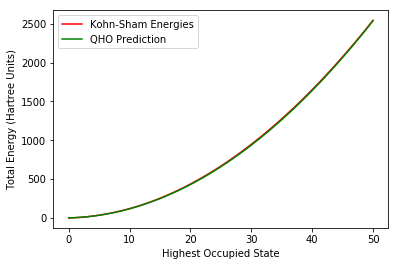

In [9]:
# Draws graph of energies
plt.plot(xAxis, Eks[1:], color='red', label = 'Kohn-Sham Energies') # Plots KS energies
plt.plot(xAxis, Etf[1:], color='b', label = 'Thomas-Fermi Energies') # Plots TF energies
plt.plot(xAxis, Eqh[1:], color='g', label = 'QHO Prediction') # Plots TF energies

plt.legend(loc='upper left')
plt.xlabel('Highest Occupied State')
plt.ylabel('Total Energy (Hartree Units)')

FileName = 'graph_KS_QHO_{0}.png'.format(NnMax - 2)

plt.savefig(FileName)
plt.show()

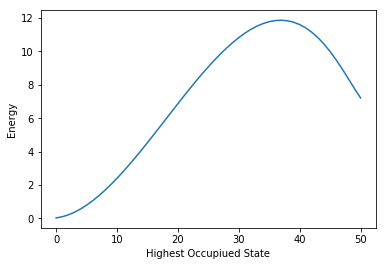

In [115]:
# Finds differecne between KS and QHO energies

Diff = np.zeros(NnMax, dtype=np.float64) # Initilises array
Diff = abs(Eqh - Eks) # Finds difference at each number of states

plt.plot(xAxis, Diff[1:]) # Plots the difference between 
# Graph labels
plt.xlabel('Highest Occupiued State')
plt.ylabel('Energy')

# Titles graph
Title2 = 'Difference between KS amd Eigenvalue KE for {0} states'.format(NnMax - 1)
#plt.title(Title2)

# Outputs graph to png
FileName = 'Difference_QHO_KS_{0}.png'.format(NnMax - 2)
plt.savefig(FileName)

plt.show()